In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('IRIS.csv')
df['species'].unique()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# df['species']=df['species'].str.replace('Iris-','')

df['species'].replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                      value=['setosa','versicolor','virginica'],inplace=True)

In [4]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

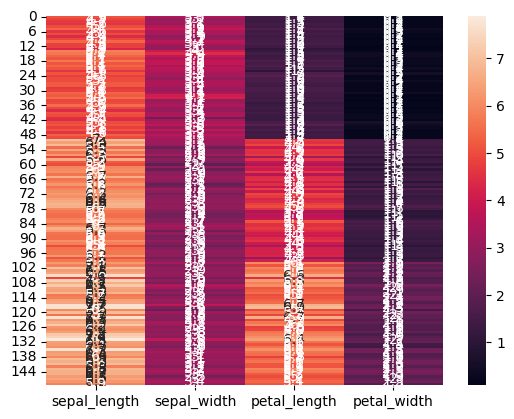

In [5]:
df2=df.loc[:,'sepal_length':'petal_width']
#sns.heatmap(df,annot=True)
df2
sns.heatmap(df2,annot=True)
plt.show()

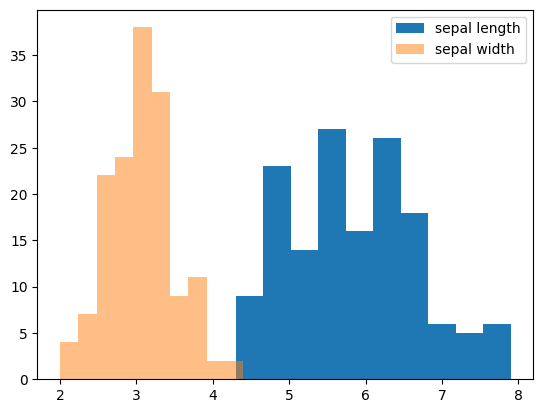

In [6]:
plt.hist(df['sepal_length'],bins=10,alpha=1.0,label="sepal length")
plt.hist(df['sepal_width'],bins=10,alpha=0.5,label="sepal width")
plt.legend()
plt.show()

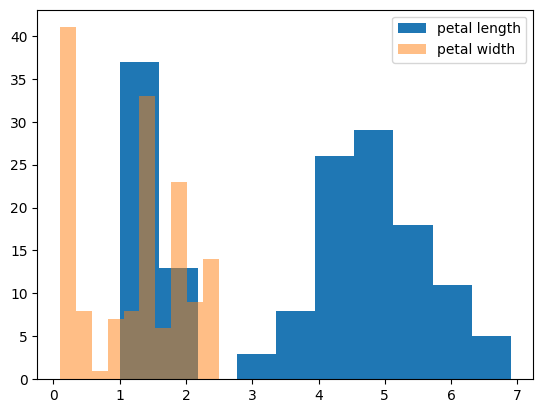

In [7]:
plt.hist(df['petal_length'],bins=10,alpha=1.0,label="petal length")
plt.hist(df['petal_width'],bins=10,alpha=0.5,label="petal width")
plt.legend()
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [15]:
# change the value of Species to mumeric 

from sklearn import preprocessing
LE= preprocessing.LabelEncoder()

df['species']=LE.fit_transform(df['species'])

In [30]:
X= df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y=df['species']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
                                   X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [47]:
from sklearn.linear_model import LogisticRegression 

lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Tusarjyoti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
#predict the test 
predict=lr.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [51]:
conf_m=confusion_matrix(y,predict)

ValueError: Found input variables with inconsistent numbers of samples: [150, 38]